# <p style="background-color:#e36288; font-family:newtimeroman; color:#FFF9ED; font-size:220%; text-align:center; border-radius:10px 10px;">Gradient Boosting Classification: Mushroom Dataset</p>

<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction

In this project, I will classify poisonous and edible mushrooms using a Supervised Machine Learning Model, Gradient Boosting.

In another notebook, I applied the AdaBoost (Adaptive Boosting) model for the same dataset. For detailed information about the dataset and to compare the approaches and results of both models, see also the AdaBoost notebook.

### Gradient Boosting:

* Similar to AdaBoost, weak learners are created in series in order to produce a strong ensemble model in Gradient Boosting.
* Gradient Boosting makes use of the **residual error for learning**.

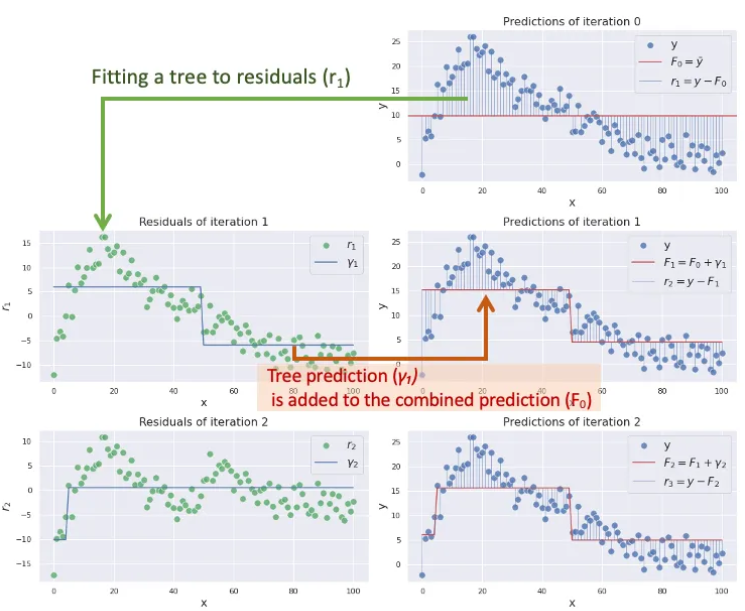


#### AdaBoost vs Gradient Boosting  
* Compared to AdaBoost, Lasrger Trees allowed in Gradient Boosting.
* Learning Rate coefficient same for all weak learners.
* We optimize the series of trees by learning on the residuals, forcing subsequent trees to attempt to correct for the error in the previous trees.

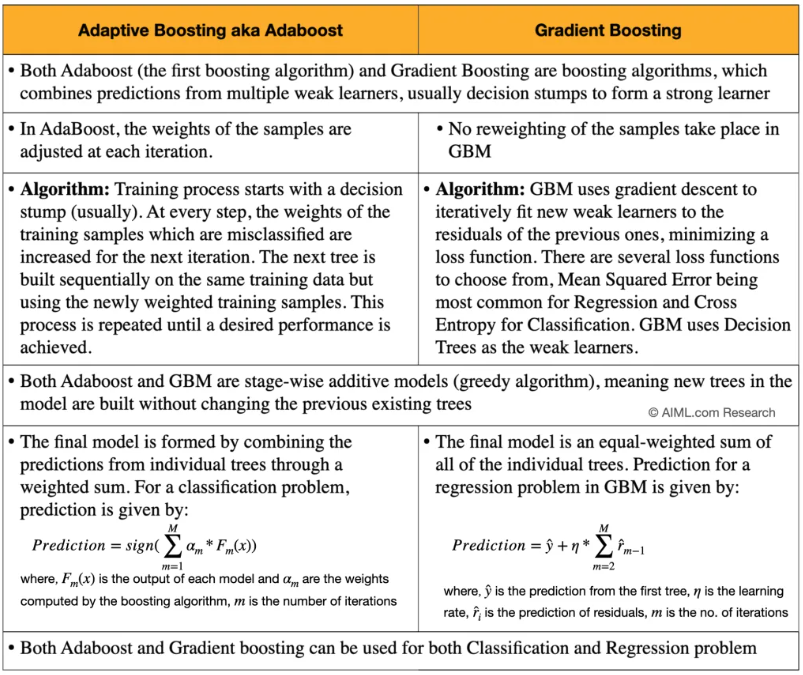

</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# balanced or imbalanced target variable
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

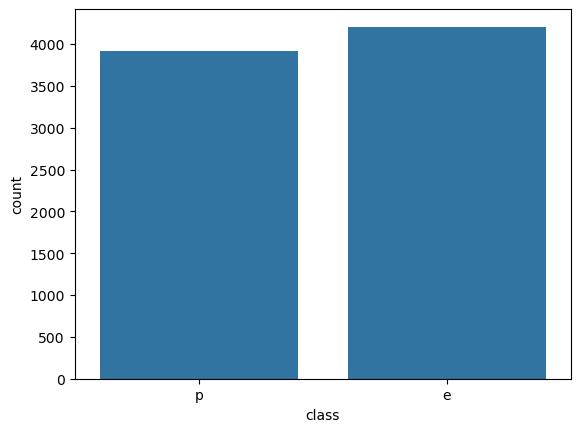

In [7]:
# Visualize it
sns.countplot(df, x="class");

In [8]:
# All variables have categorical data. Unique shows us the number of categories in each column
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Train | Test Split

In [9]:
# Drop the target column
X = df.drop('class',axis=1)

In [10]:
# Convert categories into numbers (0 and 1)
X = pd.get_dummies(X, dtype=int, drop_first=True)

In [11]:
# See the X data with numeric categories (0 and 1)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Target column
y = df['class']

In [13]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Snce we use GridSearch, we can determine small size of test data
# In AdaBoost model we used  test_size=0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

## Gradient Boosting and GridSearchCV

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
# help(GradientBoostingClassifier)

# Parameters with default values
"""
GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, 
criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, 
verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
"""

"\nGradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, \ncriterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, \nmax_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, \nverbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)\n"

In [19]:
from sklearn.model_selection import GridSearchCV

In [23]:
# For the best parameters

param_grid = {"n_estimators":[1,5,10,20,40,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth':[3,4,5,6]}

In [24]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier()

In [25]:
# The grid model
grid = GridSearchCV(gb_model,param_grid)

In [26]:
# Fit the model
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [27]:
# See the best parameters
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

Learning rate and maximum depth are default values for this model.

## Evaluation

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# To plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay  

In [30]:
# Prediction of the grid model
predictions = grid.predict(X_test)

In [31]:
# See the predictions
predictions

# e for edible, p for poisonous

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [32]:
# Confusion Matrix
confusion_matrix(y_test, predictions)

array([[444,   0],
       [  1, 368]], dtype=int64)

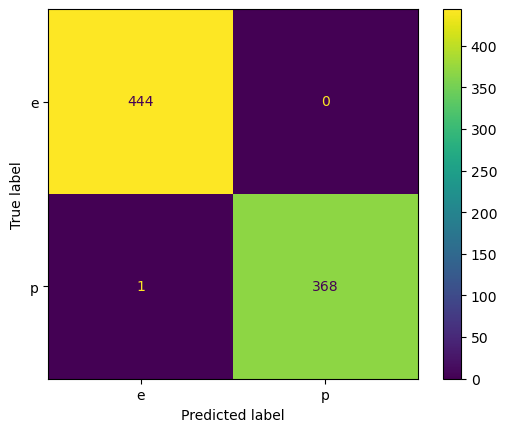

In [33]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions);

In [34]:
# See the accuracy score
accuracy_score(y_test, predictions)

0.998769987699877

In [35]:
# Look at the Classification Report and compare the classes

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



**Reesult:** Compared to AdaBoost model, Gradient Boosting model with GridSearchCV provided higher scores and better prediction.

## Feature Importance

In [37]:
grid.best_estimator_.feature_importances_

array([8.99796815e-05, 7.24704393e-16, 2.23552525e-18, 0.00000000e+00,
       5.65640997e-17, 1.69054995e-03, 6.54340951e-16, 5.80990630e-17,
       0.00000000e+00, 0.00000000e+00, 1.46691464e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.46823802e-17,
       2.39540243e-03, 5.38719016e-02, 0.00000000e+00, 1.76417144e-02,
       2.07854257e-02, 1.57874897e-03, 6.16898513e-01, 5.58781104e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17448807e-02,
       1.16514586e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.62824150e-05, 4.48972693e-04, 1.29215860e-01, 8.48778368e-03,
       5.31087097e-02, 2.96689454e-04, 4.49187490e-17, 0.00000000e+00,
       0.00000000e+00, 2.08162000e-03, 1.29904200e-02, 1.38514281e-07,
       0.00000000e+00, 0.00000000e+00, 1.29058017e-04, 0.00000000e+00,
      

In [38]:
feat_import = grid.best_estimator_.feature_importances_

In [39]:
# Show it as a DataFrame
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,8.997968e-05
cap-shape_f,7.247044e-16
cap-shape_k,2.235525e-18
cap-shape_s,0.000000e+00
cap-shape_x,5.656410e-17
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,7.776889e-18


In [40]:
# Sort it in descending order
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.616899
stalk-root_c,0.129216
bruises_t,0.053872
stalk-root_r,0.053109
spore-print-color_r,0.031883
...,...
stalk-color-above-ring_g,0.000000
stalk-color-above-ring_o,0.000000
stalk-color-above-ring_p,0.000000
stalk-color-above-ring_y,0.000000


In [41]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064808,0.0,0.0,0.0,0.000649,0.616899


In [42]:
# Since there are lots of zeros, let's display relatively more important ones by determining a minimum treshold

imp_feats = imp_feats[imp_feats['Importance'] > 0.0005]

In [43]:
# And sort it
imp_feats.sort_values('Importance')

,Importance
odor_p,0.000559
ring-number_o,0.000738
stalk-color-below-ring_w,0.000819
stalk-color-below-ring_c,0.001135
ring-type_p,0.001224
odor_m,0.001579
cap-surface_g,0.001691
stalk-surface-below-ring_s,0.002082
cap-color_y,0.002395
spore-print-color_w,0.002735


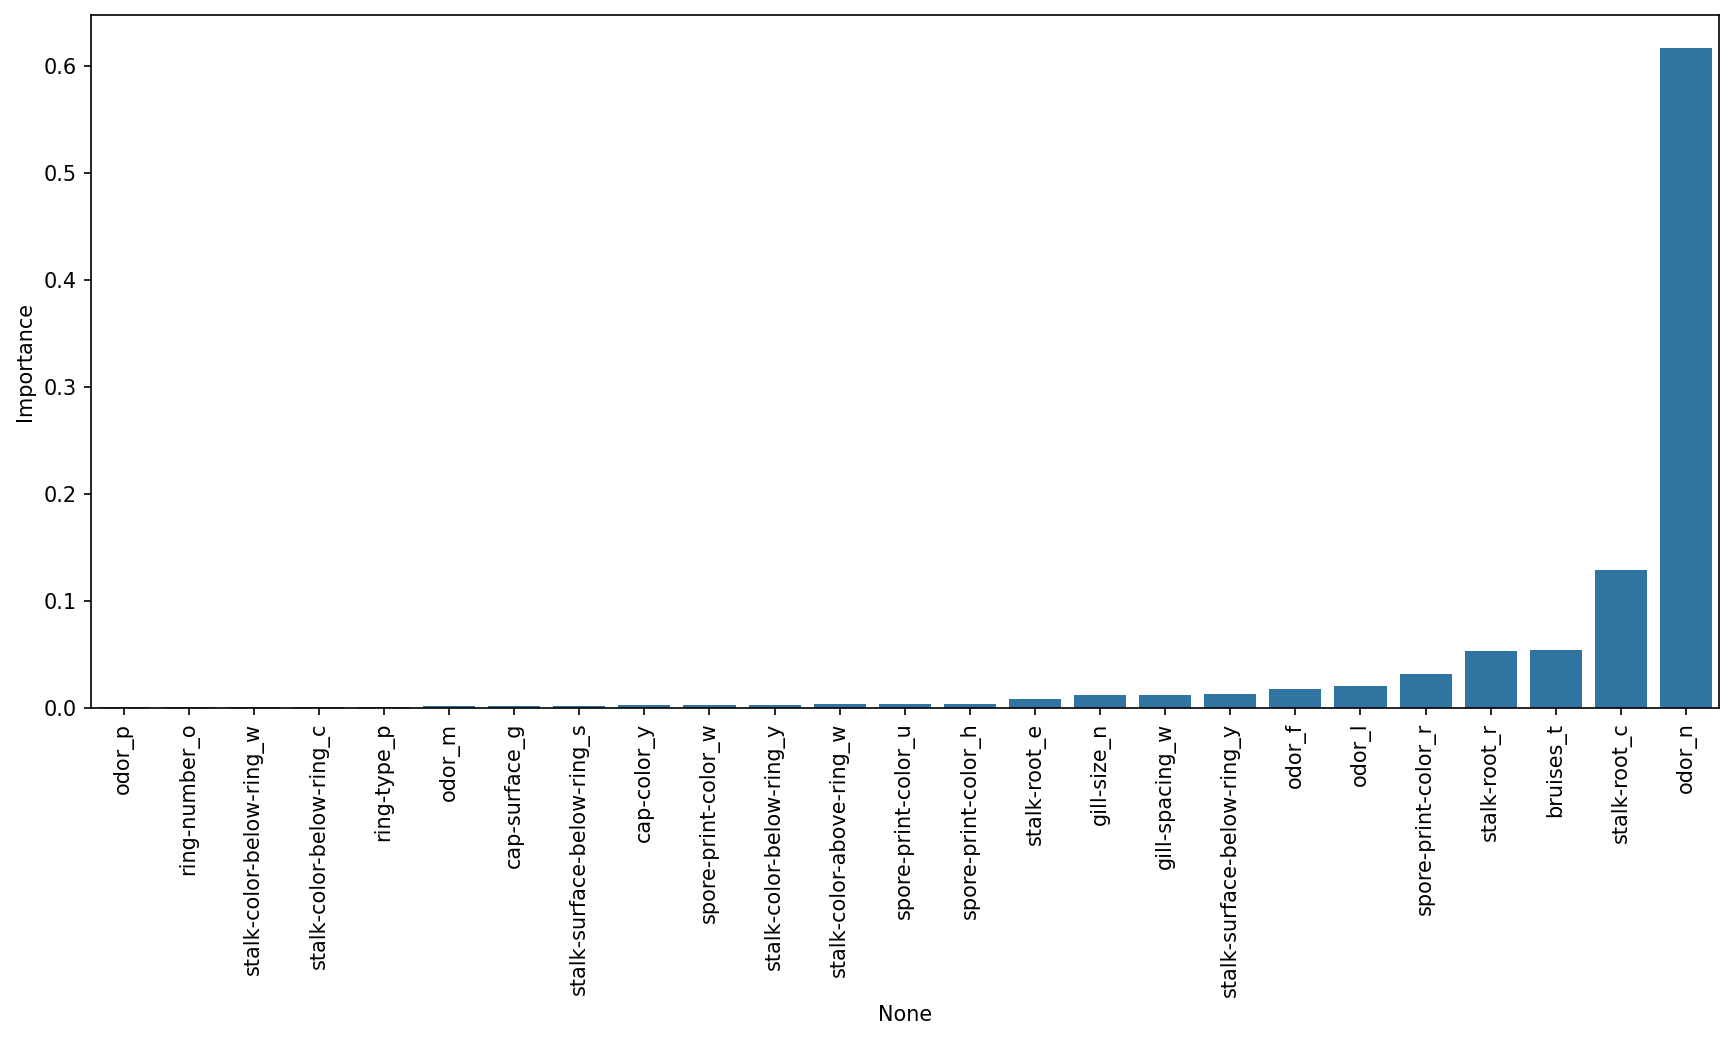

In [44]:
# Visualize it

plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

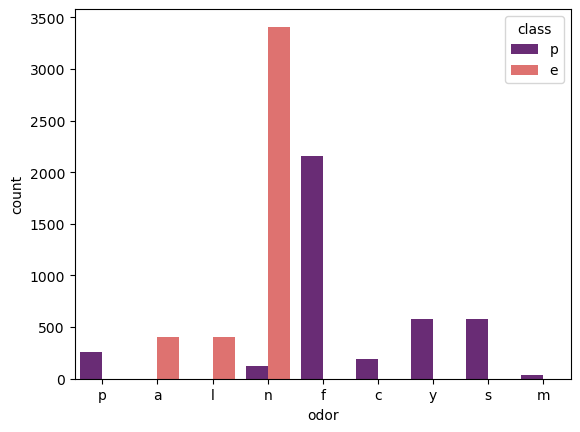

In [45]:
# Take a look at the "odor" feature
sns.countplot(data=df,x='odor',hue='class', palette="magma");

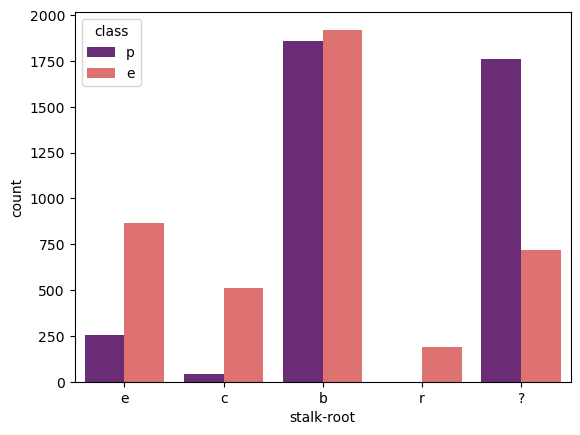

In [49]:
# See also other important feature: "stalk-root"
sns.countplot(data=df,x='stalk-root',hue='class', palette="magma");

<div class="alert alert-warning alert-info">
    
<span style=" color:#bf2e98"> 

**Insight:** According to the Gradient Boosting model, **odor_n** (no odor) feature is  very important to determine whether a mushroom is edible or poisonous. As seen from the plots, most of the edible (e) type mushrooms do not have odor. **Stalk-root** feature is also important because "c" category on the plot consists mostly of edible mushrooms , whereas "r" category does not have any poisonous type mushrooms.
</span>